# Edibility of Mushrooms

# Introduction:
- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal

Mushrooms can be made for delicious dishes, but some of them are poisonous! Identifying the edibility from the appearance of mushrooms would be essential especially when we encounter a new species of mushroom.

- Clearly state the question you will try to answer with your project


In our project, we aim to train a model which uses classification method to predict whether an unknown mushroom is edible or poisonous given various dimensions in its appearance.

- Identify and describe the dataset that will be used to answer the question

The dataset to train our model is called "Secondary mushroom data" from UCI Machine Learning Repository (https://mushroom.mathematik.uni-marburg.de/files/). This dataset includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms per species). Each mushroom is identified as edible, poisonous, or of unknown edibility. Of the 20 variables, 3 are continuous, and 17 are nominal (3 are binary, and 14 are categorical).

# Preliminary exploratory data analysis:
- Demonstrate that the dataset can be read from the web into R 

In [1]:
library(tidyverse)
library(tidymodels)
library(cowplot)
set.seed(777)
mushrooms <- read_delim("data\ folder/secondary_data.csv", delim=";")
head(mushrooms)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

class cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed
1 p     15.26        x         g           o         FALSE               
2 p     16.60        x         g           o         FALSE               
3 p     14.07        x         g           o         FALSE               
4 p     14.17        f         h           e         FALSE               
5 p     14.64        x         h           o         FALSE               
6 p     15.34        x         g           o         FALSE               
  gill-attachment gill-spacing gill-color stem-height ⋯ stem-root stem-surface
1 e               NA           w          16.95       ⋯ s         y           
2 e               NA           w          17.99       ⋯ s         y           
3 e               NA           w          17.80       ⋯ s         y           
4 e               NA           w          15.77       ⋯ s         y           
5 e               NA           w          16.53       ⋯ s         y           
6 e               NA           w          17.84       ⋯ s         y           
  stem-color veil-type veil-color has-ring ring-type spore-print-color habitat
1 w          u         w          TRUE     g         NA                d      
2 w          u         w          TRUE     g         NA                d      
3 w          u         w          TRUE     g         NA                d      
4 w          u         w          TRUE     p         NA                d      
5 w          u         w          TRUE     p         NA                d      
6 w          u         w          TRUE     p         NA                d      
  season
1 w     
2 u     
3 w     
4 w     
5 w     
6 u

- Clean and wrangle your data into a tidy format

In [2]:
colnames(mushrooms) <- c(
    "class",
    "diameter",
    "cap_shape",
    "cap_surface",
    "cap_color",
    "does_bruise_or_bleed",
    "gill_attachment",
    "gill_spacing",
    "gill_color",
    "height",
    "width",
    "stem_root",
    "stem_surface",
    "stem_color",
    "veil_type",
    "veil_color",
    "has_ring",
    "ring_type",
    "spore_print_color",
    "habitat",
    "season"
)

mushroom_split <- mushrooms |>
    mutate(across(-c(diameter, height, width), factor)) |>
    initial_split(prop=0.75, strata=class)

mushroom_training_raw <- training(mushroom_split)
mushroom_training <- mushroom_training_raw |>
    select(class, diameter, height, width)
head(mushroom_training)

class diameter height width
1 e      9.59     9.87  14.71
2 e      9.59     7.82  15.06
3 e      8.40     8.66  13.02
4 e     10.50    13.35  20.89
5 e      7.68    10.07  15.26
6 e      9.10    11.66  17.84

- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

In [3]:
#This table reports the number of observations in each class
summarize_mushroom <- mushroom_training |>
    group_by(class) |>
    summarize(n = n())
summarize_mushroom

#This table gives the means of the predictor variables in our analysis
means_mushroom <- mushroom_training |>
    select(-class) |>
    map_df(mean)
    means_mushroom

#This calculates the number of rows that have missing data
missing_data <- mushroom_training |>
    filter(is.na(class) || is.na(diameter) || is.na(height) || is.na(width)) |>
    nrow()
missing_data

# sum(apply(mushroom_training, 1, function(x) any(is.na(x))) == TRUE) # count rows with na, same as above

class n    
1 e     20385
2 p     25416

diameter height   width   
1 6.732303 6.583149 12.15496

[1] 0

- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

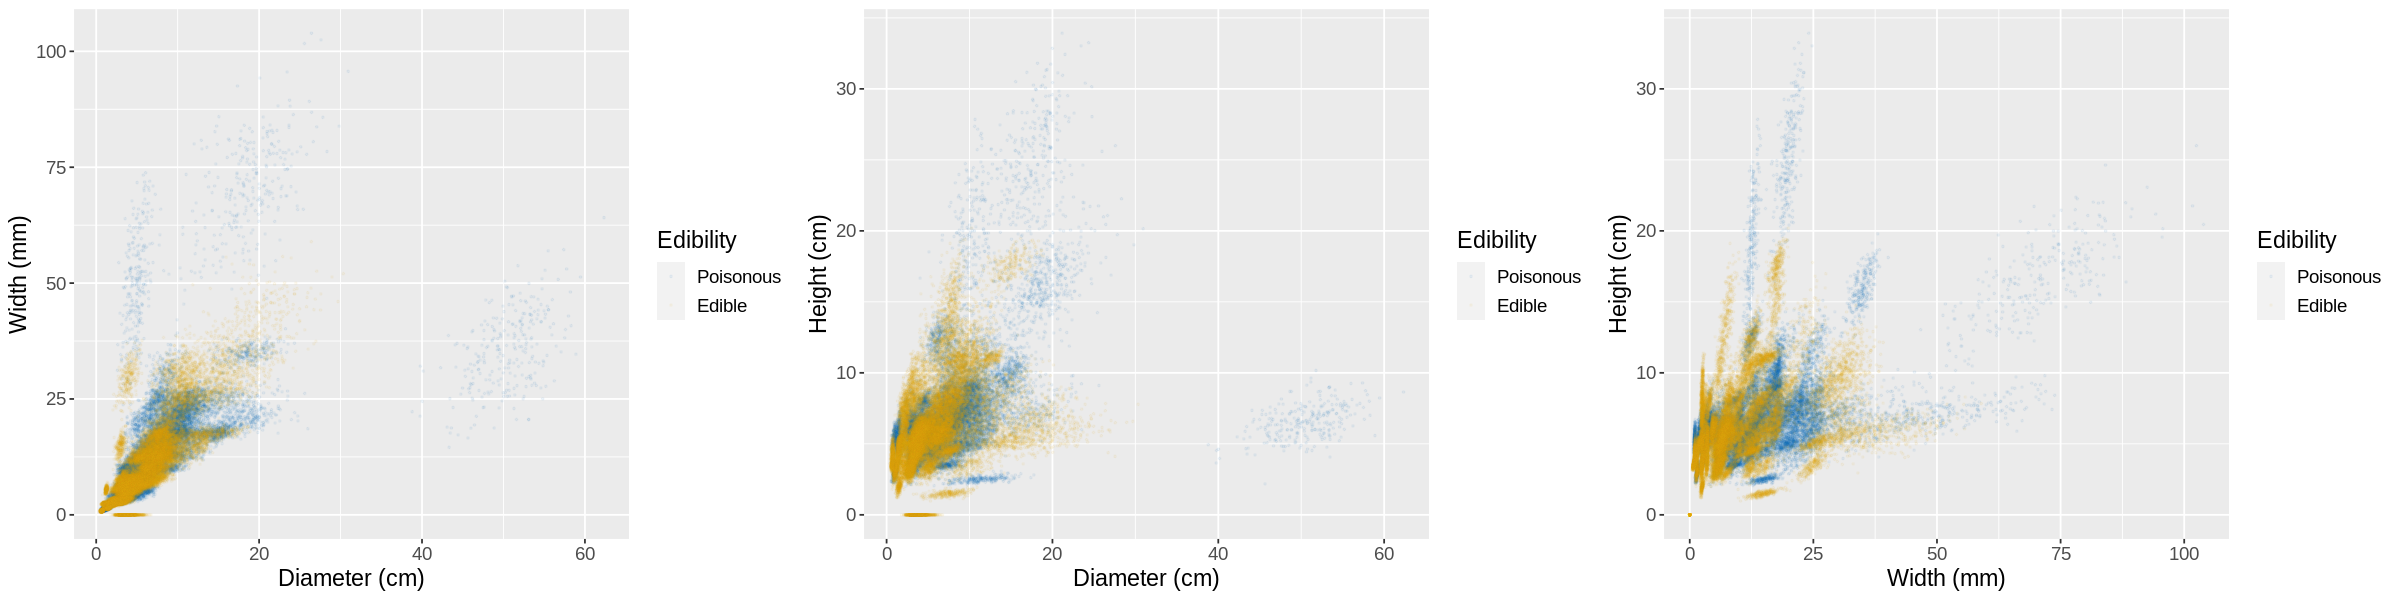

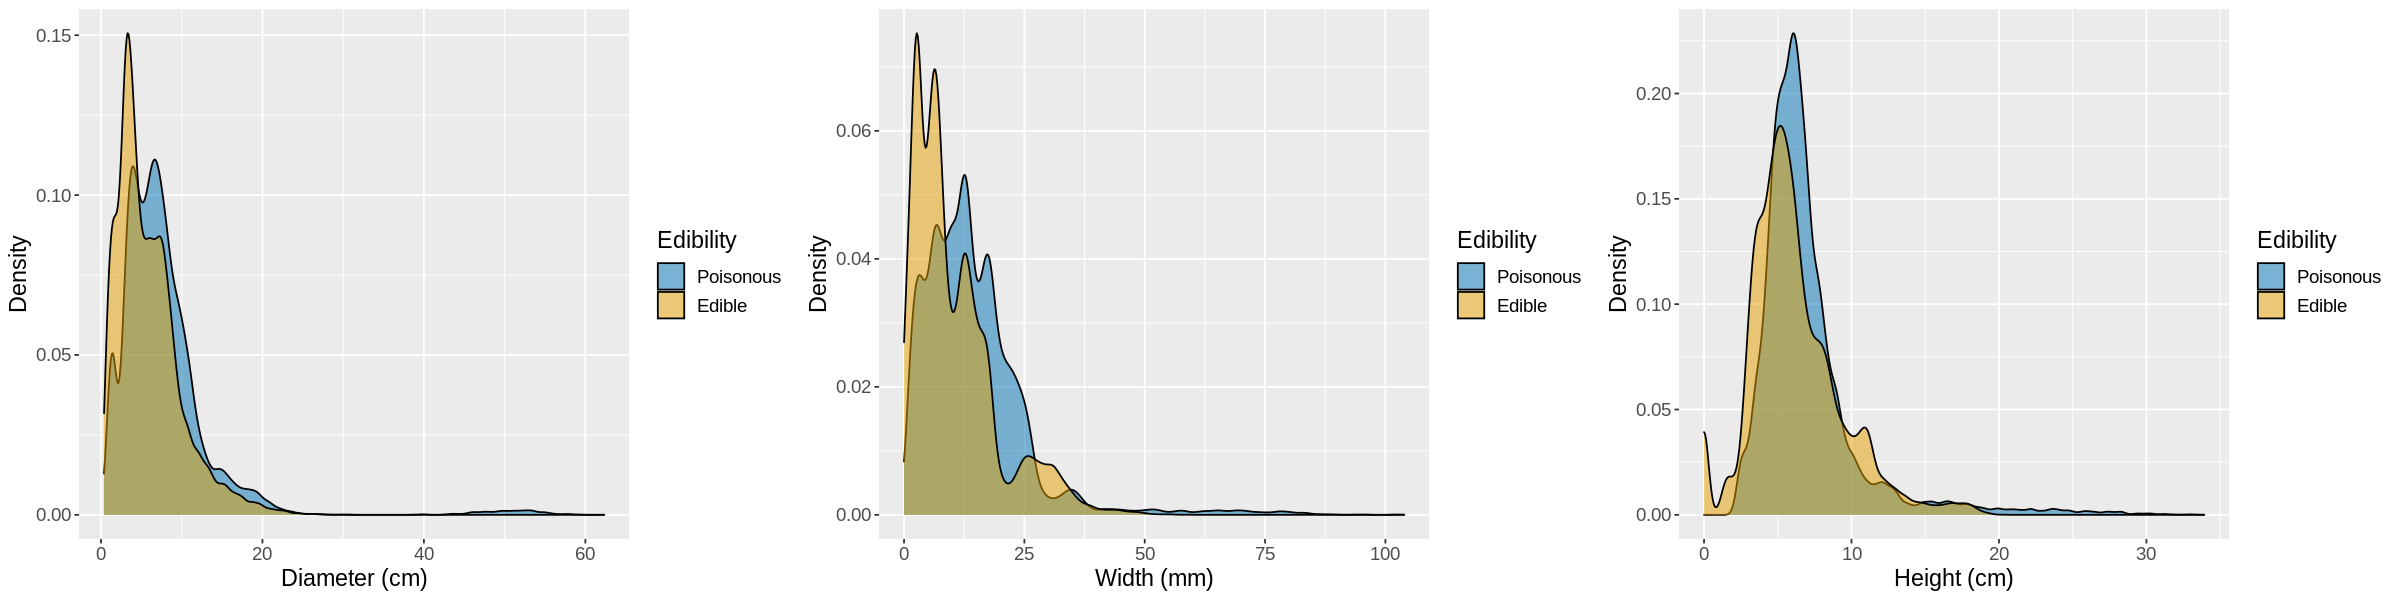

In [4]:
#library(rcartocolor)

mushroom_plot1 <- mushroom_training |>
    ggplot(aes(x=diameter, y=width, color=class)) +
    geom_point(alpha=.05, size=.4) +
    labs(x="Diameter (cm)", y="Width (mm)", color="Edibility") +
    scale_color_manual(labels = c("Poisonous", "Edible"), values = c("#0072B2", "#E69F00")) +
    theme(text=element_text(size=14))
mushroom_plot2 <- mushroom_training |>
    ggplot(aes(x=diameter, y=height, color=class)) +
    geom_point(alpha=.05, size=.4) +
    labs(x="Diameter (cm)", y="Height (cm)", color="Edibility") +
    scale_color_manual(labels = c("Poisonous", "Edible"), values = c("#0072B2", "#E69F00")) +
    theme(text=element_text(size=14))
mushroom_plot3 <- mushroom_training |>
    ggplot(aes(x=width, y=height, color=class)) +
    geom_point(alpha=.05, size=.4) +
    labs(x="Width (mm)", y="Height (cm)", color="Edibility") +
    scale_color_manual(labels = c("Poisonous", "Edible"), values = c("#0072B2", "#E69F00")) +
    theme(text=element_text(size=14))
#mushroom_plot1
#mushroom_plot2
#mushroom_plot3


# Marginal density plot of diamter (top panel)
diameterDensity <- ggplot(mushroom_training, aes(diameter, fill=class)) + 
    geom_density(alpha=.5) + 
    labs(x = "Diameter (cm)", y = "Density", fill = "Edibility") +
    scale_fill_manual(labels = c("Poisonous", "Edible"), values = c("#0072B2", "#E69F00")) +
    #theme(legend.position = "none") +
    theme(text=element_text(size=14))
#diameterDensity

# Marginal density plot of width (right panel)
widthDensity <- ggplot(mushroom_training, aes(width, fill=class)) + 
    geom_density(alpha=.5) + 
    labs(x = "Width (mm)", y = "Density", fill = "Edibility") +
    scale_fill_manual(labels = c("Poisonous", "Edible"), values = c("#0072B2", "#E69F00")) +
    #theme(legend.position = "none") +
    theme(text=element_text(size=14))
#widthDensity

# Marginal density plot of height
heightDensity <- ggplot(mushroom_training, aes(height, fill=class)) + 
    geom_density(alpha=.5) + 
    labs(x = "Height (cm)", y = "Density", fill = "Edibility") +
    scale_fill_manual(labels = c("Poisonous", "Edible"), values = c("#0072B2", "#E69F00")) +
    #theme(legend.position = "none") +
    theme(text=element_text(size=14))
#heightDensity

options(repr.plot.width = 20, repr.plot.height = 5)
plot_grid(mushroom_plot1, mushroom_plot2, mushroom_plot3, ncol = 3)
plot_grid(diameterDensity, widthDensity, heightDensity, ncol = 3)
# consider side-by-side instead of overlap

In [5]:

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# Can edit these to configure charts below                                        #
#                                                                                 #
selectedCols <- mushroom_training_raw |>                                          #
    # select(does_bruise_or_bleed, veil_type, has_ring, cap_shape, cap_color)     #
    select(-c(class, diameter, width, height))                                    #
x_var <- "Height"                                                                 #
y_var <- "Diameter"                                                               #
x_lim <- c(0, 15) # c(0,35)                                                       #
y_lim <- c(0, 25) # c(0,65)                                                       #
sampleRate <- .3 # dont touch this                                              # #
#                                                                             # # #
#                                                                           # # # #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

set.seed(777)
cat_vars <- selectedCols |> 
    # sample_n(nrow(mushroom_training_raw) * sampleRate) |>
    map_df(~ tibble(x=.x), .id="dist") |>
    mutate(dist=as_factor(dist))
cat_vars_full <- selectedCols |> 
    map_df(~ tibble(x=.x), .id="dist") |>
    mutate(dist=as_factor(dist))
# cat_vars |>
# group_by(dist) |>
# summarize(n=n())

set.seed(777)
poisonPlots <- map(colnames(selectedCols), function(col_name)
    plot_grid(
        cat_vars |>
        filter(dist == col_name) |>
        cbind(mushroom_training
              # |> sample_n(nrow(mushroom_training_raw) * sampleRate)
        ) |>
        filter(class == "p") |>
        ggplot(aes_string(x=tolower(x_var), y=tolower(y_var), color="x")) +
        geom_point(size=0.3, na.rm = TRUE) +
        labs(x=x_var, y=y_var, color="") +
        lims(x = x_lim, y = y_lim) +
        theme(
            panel.background = element_rect(fill = alpha('blue', 0.05), colour = 'black'), 
            # legend.position="none", # "top", 
            aspect.ratio=1, 
            plot.margin = unit(c(2, 0, 0, 2), "cm"), # c(t, r, b, l)
            plot.title = element_text(hjust = 0.5)
        ) + 
        theme(
            legend.position = c(.05, 1),
            legend.justification = c("left", "top"),
            legend.box.just = "left",
            legend.margin = margin(0, 0, 0, 0),
            legend.key.size = unit(.5, 'cm'), #change legend key size
            legend.key.height = unit(.5, 'cm'), #change legend key height
            legend.key.width = unit(.5, 'cm'), #change legend key width
            legend.background = element_rect(fill = alpha('yellow', 0)),
            legend.key = element_rect(fill = alpha('yellow', 0)),
        ) + 
        guides(color = guide_legend(override.aes = list(size = 5))) +
        ggtitle(paste(col_name, "Poisonous", sep=" | ")),
        cat_vars_full |>
            filter(dist == col_name) |>
            cbind(mushroom_training) |>
            filter(class == "p") |>
            group_by(x) |>
            summarize(n=n()) |>
            ggplot(aes(fill=x,y=n,x='')) + 
                geom_bar(position="fill", stat="identity") +
                theme_bw() +
                theme(axis.title.x=element_blank(),
                    axis.text.x=element_blank(),
                    axis.ticks.x=element_blank(),
                    axis.title.y=element_blank(),
                    axis.text.y=element_blank(),
                    axis.ticks.y=element_blank(),
                    legend.position="none") + 
                theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) + 
                theme(panel.border = element_blank()) +
                theme(aspect.ratio=20, plot.margin=unit(c(2,0,0,0), "cm")),
        ncol=2,
        rel_widths=c(1,.1)
    )
)
set.seed(777)
ediblePlots <- map(colnames(selectedCols), function(col_name)
    plot_grid(
        cat_vars_full |>
            filter(dist == col_name) |>
            cbind(mushroom_training) |>
            filter(class == "e") |>
            group_by(x) |>
            summarize(n=n()) |>
            ggplot(aes(fill=x,y=n,x='')) + 
                geom_bar(position="fill", stat="identity") +
                theme_bw() +
                theme(axis.title.x=element_blank(),
                    axis.text.x=element_blank(),
                    axis.ticks.x=element_blank(),
                    axis.title.y=element_blank(),
                    axis.text.y=element_blank(),
                    axis.ticks.y=element_blank(),
                    legend.position="none") + 
                theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) + 
                theme(panel.border = element_blank()) +
                theme(aspect.ratio=20, plot.margin=unit(c(2,0,0,0), "cm")),
        cat_vars |>
            filter(dist == col_name) |>
            cbind(mushroom_training
                  # |> sample_n(nrow(mushroom_training_raw) * sampleRate)
            ) |>
            filter(class == "e") |>
            ggplot(aes_string(x=tolower(x_var), y=tolower(y_var), color="x")) +
            geom_point(size=0.3, na.rm = TRUE) +
            labs(x=x_var, y=y_var, color="") +
            lims(x = x_lim, y = y_lim) +
            theme(
                axis.title.y=element_blank(),
                panel.background = element_rect(fill = alpha('yellow', 0.05), colour = 'black'), 
                aspect.ratio=1,
                plot.margin = unit(c(2, 2, 0, 0), "cm"), # c(t, r, b, l)
                plot.title = element_text(hjust = 0.5),
                legend.position = "none"
            ) +
            ggtitle(paste(col_name, "Edible", sep=" | ")),
        ncol=2,
        rel_widths=c(.1,1)
    )
)

# options(repr.plot.width = 4, repr.plot.height = 4)
plots <- c(rbind(poisonPlots,ediblePlots))

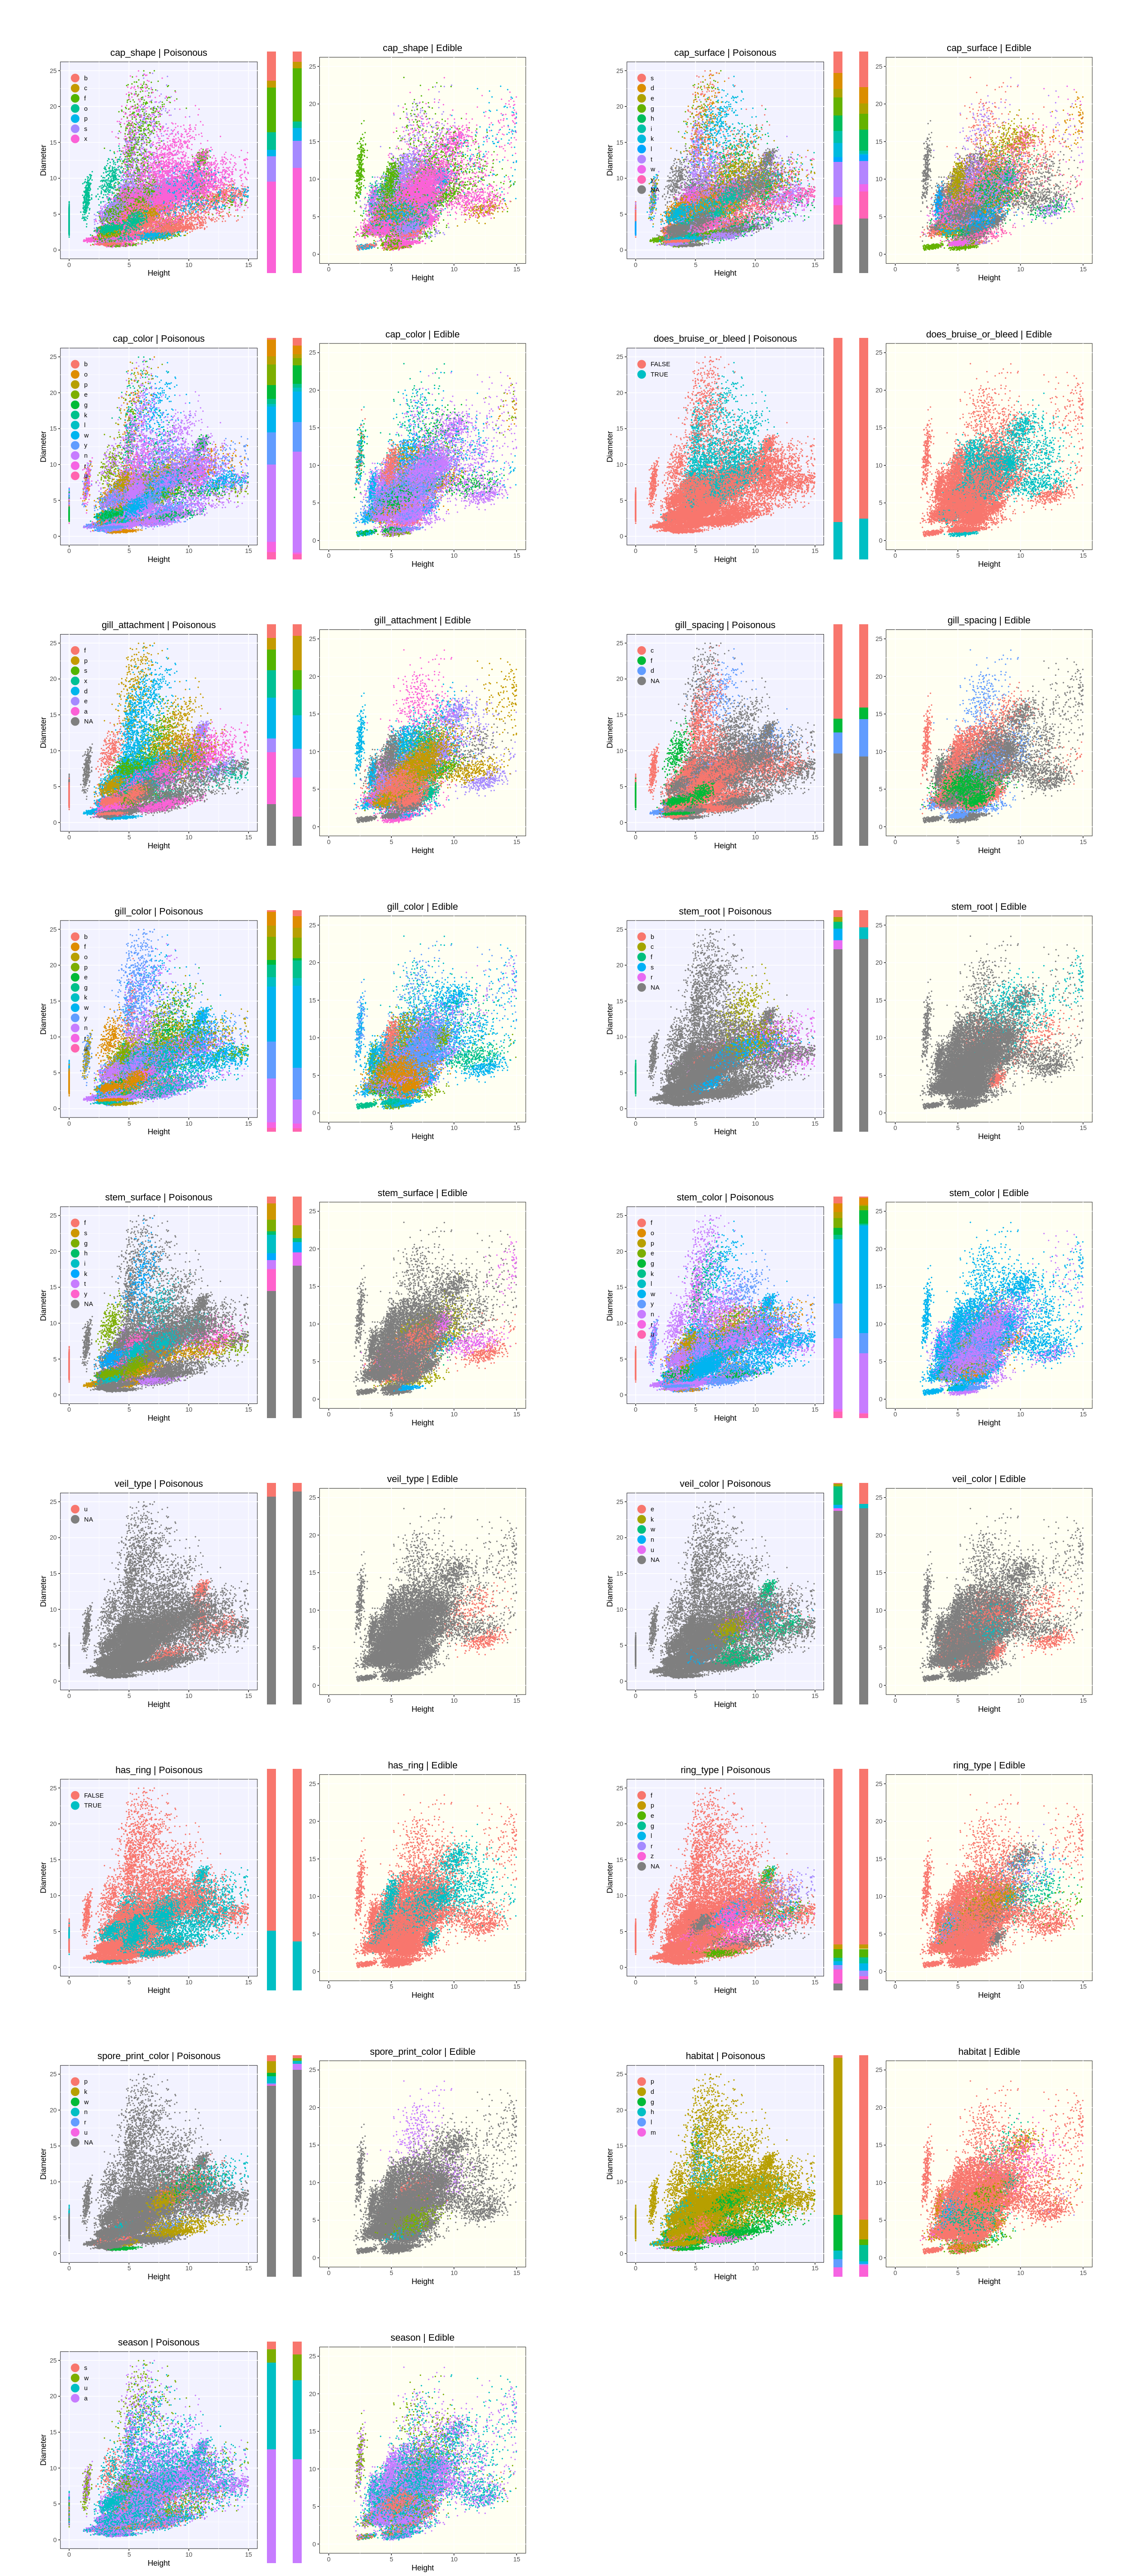

In [6]:
options(repr.plot.width = 22, repr.plot.height = 50)
plot_grid(plotlist=plots, ncol=4,byrow=TRUE, axis="tblr")

Each letter in the color legend stands for a category. For example, for the variable "cap_shape", we have "bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o." This information can be found in "secondary_data_meta.txt" in our data folder. They are not unfolded here due to limited space on the plot.

#### Compare distributions on continous variables.
Some categories have different patterns in the distributions for different classes:
- cap_shape

#### Compare frequencies of categories between the classes
Does one class have a vastly higher/lower chance of being a certain category?
- spore_print_color - w

"w" = green is not present at all in edible mushrooms, but is present in poisonous ones.
- habitat - p, d

"p" =  paths seem to only present in edible mushrooms, and "d" = woods only present in poisonous ones.
- season - w

"w" = winter has a higher chance of being present in edible mushrooms than poisonous ones.
- ring_type - z

"z" = zone has a higher chance of being present in poisonous mushrooms than edible ones.
- stem_surface - f, i

"f" = none has a higher chance of being present in edible mushrooms than poisonous ones.

"i" = fibrous has a higher chance of being present in poisonous mushrooms than edible ones.
- stem_root - b, s

"s" = swollen is not present at all in edible mushrooms, but is present in poisonous ones.

"b" = bulbous has a higher chance of being present in edible mushrooms than poisonous ones.
- cap_surface - s, i

"s" = smooth has a higher chance of being present in edible mushrooms than poisonous ones.

"i" = fibrous has a higher chance of being present in poisonous mushrooms than edible ones.
- cap_color - b

"b" = buff has a vastly higher chance of being present in edible mushrooms than poisonous ones.

# Methods:
- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

The available vairables are 3 continuous and 3 binary, of which we can modify the values into 0 and 1.
1) Continuous: width, height, diameter
2) Binary: does-bruise-bleed, veil-type, has-ring

We will conduct our data analysis by starting with the 3 continuous variables: width, height, and diameter to determine a mushroom's edibility. From that we could identify the accuracy of the model that uses only physical attributions of a mushroom and determine whether it can provide insight regarding edibility. Later we would add binary variables to the current model and see if the accuracy will be enhanced.
- Describe at least one way that you will visualize the results

We will start off from plotting scatterplots. We will use pairing each two continous variables on the axes, which would create three parallel plots. Dots will be colored according to the predictive results - true poisonous, true edible, false poisonous, and false poisonous.

We will also plot a bar graph to compare the percentage of the four categories above - true poisonous, true edible, false poisonous, and false poisonous.

# Expected outcomes and significance:
- What do you expect to find?

We expect the accuracy of our model will be higher than randomly assigning the class to the mushroom by the proportion of the edibility of mushroom in the training set. We also expect a higher accuracy after adding the three binary varaibles to our model to increase its total predictors to six variables.

- What impact could such findings have?

There is no common methodologies to distinguish between poisonous and edible mushrooms (citation: https://www.betterhealth.vic.gov.au/health/healthyliving/fungi-poisoning). It has to rely on a mushroom expert to identify the edibility. Our model could provide the public a tool for identifying the edibility of varieties and also assist experts in making judgments. 

- What future questions could this lead to?

Since our model only uses six variables to predict the edibility of mushroom, future data scientists may increase the accuracy of its result by taking more specific and related predictor variables that adds dimensions to the model. Also, the model can be further improved if it can provide an insight on different levels of toxicity by predicting numerical values using a regression model.